In [2]:
# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd


Mean Squared Error:  4.829532502978013


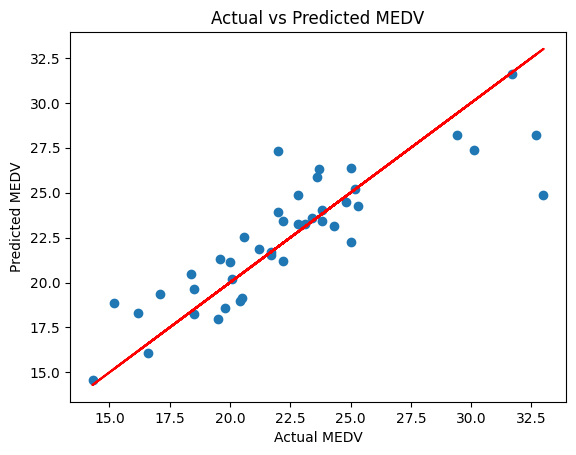

In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Function for handling outliers
def handle_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_filtered = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    return data_filtered

# Importing dataset
df = pd.read_csv("HousingData.csv")

# Fill NaN values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Handling outliers
for column in df.columns:
    df = handle_outliers(df, column)

# Data Normalization
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('MEDV', axis=1))
y = df['MEDV']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Plotting
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV')
plt.show()
